# Domain orientation

In [81]:
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from archngv.building.morphology_synthesis.domain_orientation import orientations_from_domain

# load data
with open('../test_data/test_microdomains.json') as fd:
    microdomains = json.load(fd)

/home/zisis/Projects/ARCHNGV_GERRIT/astro_venv/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


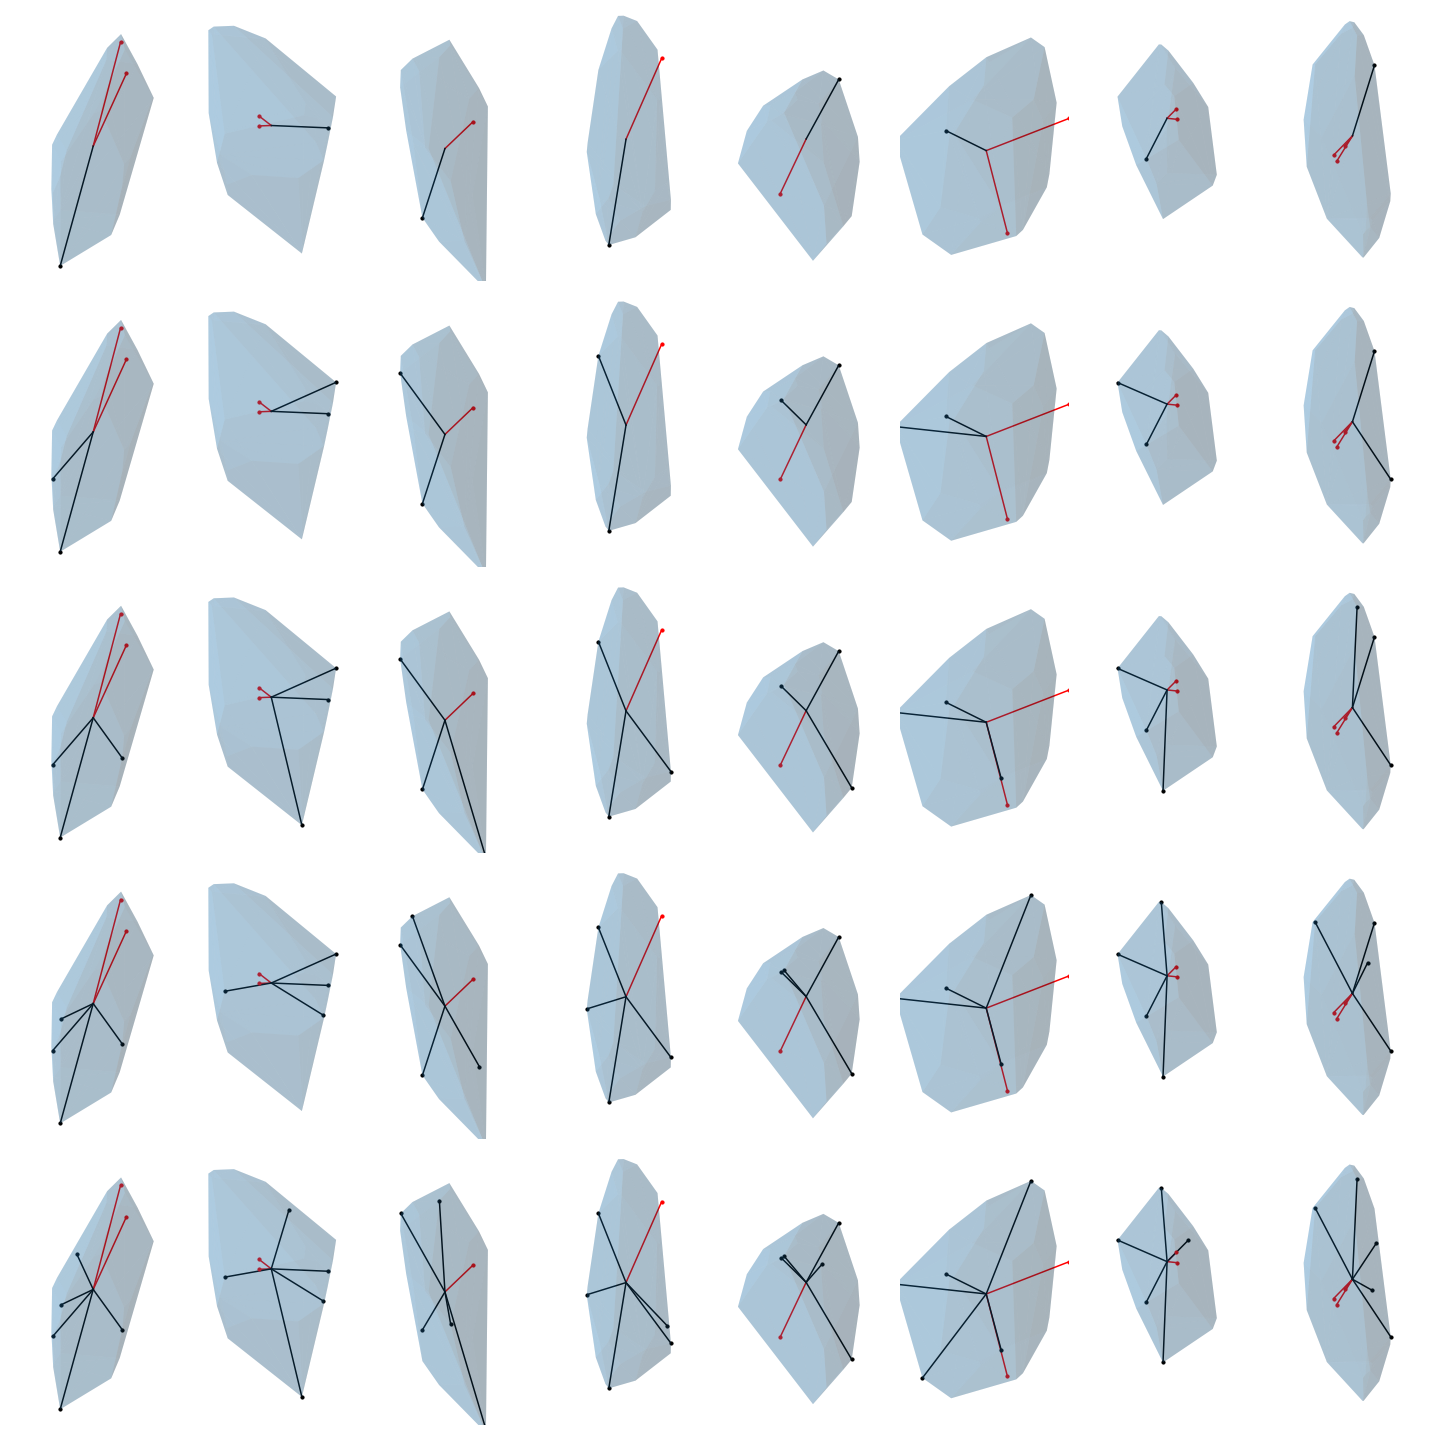

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [82]:


K = 5
N = len(microdomains)

fig, axes = plt.subplots(K, N, subplot_kw=dict(projection='3d'), figsize=(20, 20))

for i in range(K):
    for j, data in enumerate(microdomains):

        points = np.asarray(data['points'], dtype=np.float)
        triangles = np.asarray(data['triangles'], dtype=np.int)
        endfeet = np.asarray(data['endfeet_targets'], dtype=np.float)
        soma_xyz = np.asarray(data['centroid'], dtype=np.float)
        
        ax = axes[i, j]
        ax.set_axis_off()
        plt.tight_layout()


        xmin = np.min(points[:, 0])
        xmax = np.max(points[:, 0])
        ymin = np.min(points[:, 1])
        ymax = np.max(points[:, 1])
        zmin = np.min(points[:, 2])
        zmax = np.max(points[:, 2])

        ax.set_xlim([1.02 * xmin, 0.98 * xmax])
        ax.set_ylim([1.01 * ymin, 0.99 * ymax])
        ax.set_zlim([1.01 * zmin, 0.99 * zmax])

        fig = plt.figure()

        ax.plot_trisurf(*points.T, triangles=triangles, alpha=0.2)

        targets = []

        for xyz in endfeet:

            ax.scatter(*xyz, color='r', s=10)
            ax.plot(*np.column_stack((soma_xyz, xyz)), color='r')
            targets.append(xyz)

        oris, lens = orientations_from_domain(soma_xyz, points, triangles, i + 1, fixed_targets=endfeet)

        for ori, l in zip(oris, lens):

            p = soma_xyz + ori * l

            ax.scatter(*p, color='k', s=10)
            ax.plot(*np.column_stack((soma_xyz, p)), color='k')

